# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mamurras
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | sechura
Processing Record 7 of Set 1 | albert lea
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | mancio lima
Processing Record 10 of Set 1 | orland
Processing Record 11 of Set 1 | uzgen
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | ambovombe
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | mandalgovi
Processing Record 18 of Set 1 | greenville
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | rieti
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | qaqortoq
Processing Record 23 of Set 

Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | sinabang
Processing Record 43 of Set 4 | susuman
Processing Record 44 of Set 4 | luquillo
Processing Record 45 of Set 4 | kuanda
Processing Record 46 of Set 4 | hadibu
Processing Record 47 of Set 4 | anna regina
Processing Record 48 of Set 4 | harper
Processing Record 49 of Set 4 | rongelap
Processing Record 0 of Set 5 | enterprise
Processing Record 1 of Set 5 | chernyshevskiy
Processing Record 2 of Set 5 | napier
Processing Record 3 of Set 5 | puerto colombia
Processing Record 4 of Set 5 | fort st. john
Processing Record 5 of Set 5 | shevchenko
Processing Record 6 of Set 5 | dul'durga
Processing Record 7 of Set 5 | pandan
Processing Record 8 of Set 5 | yerofey pavlovich
Processing Record 9 of Set 5 | songling
Processing Record 10 of Set 5 | pyeongchang
City not found. Skipping...
Processing Record 11 of Set 5 | stanley
Processing Record 12 of Set 5 | shahrak-e pabedana
City not found. Skipping...
Processing Record 

Processing Record 31 of Set 8 | muisne
Processing Record 32 of Set 8 | dakhla
Processing Record 33 of Set 8 | pirae
Processing Record 34 of Set 8 | rabo de peixe
Processing Record 35 of Set 8 | gaalkacyo
Processing Record 36 of Set 8 | ciudad choluteca
Processing Record 37 of Set 8 | swift current
Processing Record 38 of Set 8 | polyarnyy
Processing Record 39 of Set 8 | sao tome
Processing Record 40 of Set 8 | labrador city
Processing Record 41 of Set 8 | general conesa
Processing Record 42 of Set 8 | chilecito
Processing Record 43 of Set 8 | svobodnyy
Processing Record 44 of Set 8 | quang ngai
Processing Record 45 of Set 8 | shache
Processing Record 46 of Set 8 | siocon
Processing Record 47 of Set 8 | howrah
Processing Record 48 of Set 8 | oildale
Processing Record 49 of Set 8 | porto novo
Processing Record 0 of Set 9 | santa marta
Processing Record 1 of Set 9 | znamenskoye
Processing Record 2 of Set 9 | erenhot
Processing Record 3 of Set 9 | yeed
Processing Record 4 of Set 9 | edinbu

Processing Record 22 of Set 12 | kerikeri
Processing Record 23 of Set 12 | aasiaat
Processing Record 24 of Set 12 | scarborough
Processing Record 25 of Set 12 | masumbwe
Processing Record 26 of Set 12 | sao luiz gonzaga
Processing Record 27 of Set 12 | porsgrunn
Processing Record 28 of Set 12 | una
Processing Record 29 of Set 12 | magadan
Processing Record 30 of Set 12 | forster
Processing Record 31 of Set 12 | frutal
Processing Record 32 of Set 12 | cockburn town
Processing Record 33 of Set 12 | prince rupert
Processing Record 34 of Set 12 | ixtapa
Processing Record 35 of Set 12 | bathsheba
Processing Record 36 of Set 12 | takamaka
City not found. Skipping...
Processing Record 37 of Set 12 | barra
Processing Record 38 of Set 12 | saint-philippe
Processing Record 39 of Set 12 | grand baie
Processing Record 40 of Set 12 | sturgis
Processing Record 41 of Set 12 | copiapo
Processing Record 42 of Set 12 | chadron
Processing Record 43 of Set 12 | dhidhdhoo
Processing Record 44 of Set 12 | m

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mamurras,41.5775,19.6922,299.23,61,0,2.06,AL,1690957035
1,anadyr,64.7500,177.4833,284.82,76,40,6.00,RU,1690956499
2,margaret river,-33.9500,115.0667,282.33,92,100,10.25,AU,1690956489
3,papatowai,-46.5619,169.4708,278.30,67,99,9.56,NZ,1690956504
4,avarua,-21.2078,-159.7750,295.18,78,75,4.63,CK,1690956471


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mamurras,41.5775,19.6922,299.23,61,0,2.06,AL,1690957035
1,anadyr,64.7500,177.4833,284.82,76,40,6.00,RU,1690956499
2,margaret river,-33.9500,115.0667,282.33,92,100,10.25,AU,1690956489
3,papatowai,-46.5619,169.4708,278.30,67,99,9.56,NZ,1690956504
4,avarua,-21.2078,-159.7750,295.18,78,75,4.63,CK,1690956471


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

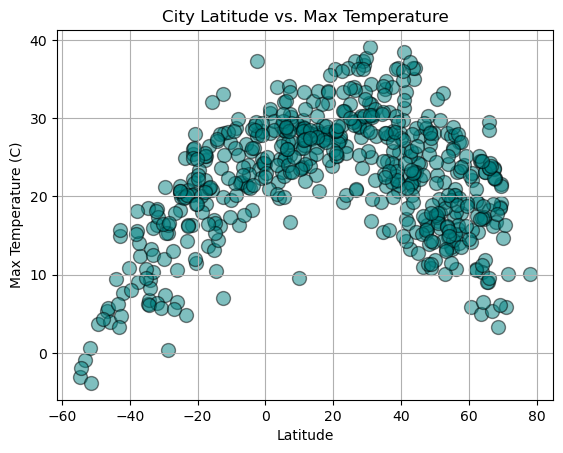

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df_celsius = city_data_df.copy()
city_data_df_celsius['Max Temp'] = city_data_df_celsius['Max Temp'] - 273
city_data_df_celsius.plot.scatter(x='Lat', y='Max Temp', c='teal', s=100, alpha=0.5, grid = True, edgecolor = 'black')
 
# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

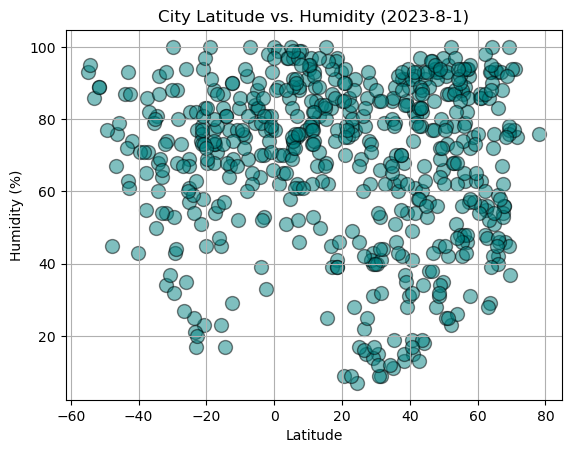

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', c='teal', s=100, alpha=0.5, grid = True, edgecolor = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-8-1)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

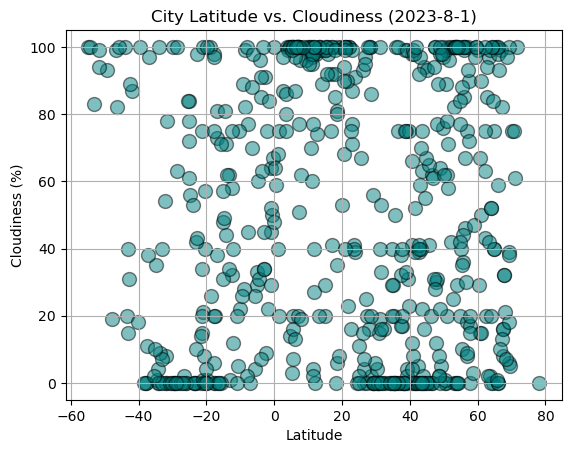

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', c='teal', s=100, alpha=0.5, grid = True, edgecolor = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-8-1)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

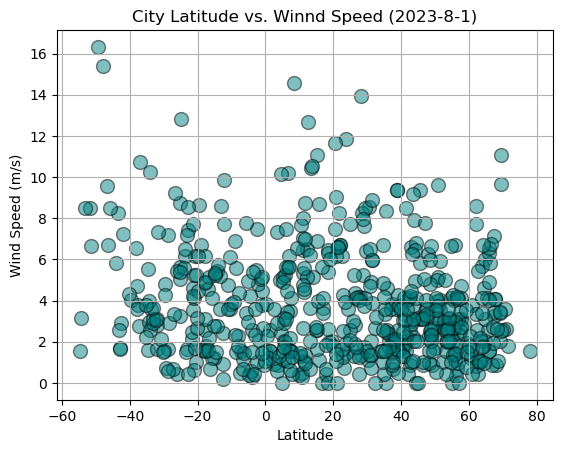

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', c='teal', s=100, alpha=0.5, grid = True, edgecolor = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Winnd Speed (2023-8-1)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(DataFrame, x_column, y_column, x_label, y_label):
    DataFrame.plot.scatter(x=x_column, y=y_column, c='teal', s=100, alpha=0.5, grid = True, edgecolor = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    slope, intercept, r_value, p_value, std_err = linregress(DataFrame[x_column], DataFrame[y_column])
    
    plt.plot(DataFrame[x_column], slope * DataFrame[x_column] + intercept, color='red')
    
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.5, 0.9, equation, transform=plt.gca().transAxes, fontsize=14, color='red')
    
    print(f'The r-value is: {r_value}')
          
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df[northern_hemi_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mamurras,41.5775,19.6922,299.23,61,0,2.06,AL,1690957035
1,anadyr,64.7500,177.4833,284.82,76,40,6.00,RU,1690956499
6,albert lea,43.6480,-93.3683,295.00,60,63,3.73,US,1690957036
7,iskateley,67.6803,53.1512,295.28,56,32,4.06,RU,1690956481
9,orland,39.7474,-122.1964,301.09,31,23,1.92,US,1690957037


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df[southern_hemi_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,282.33,92,100,10.25,AU,1690956489
3,papatowai,-46.5619,169.4708,278.30,67,99,9.56,NZ,1690956504
4,avarua,-21.2078,-159.7750,295.18,78,75,4.63,CK,1690956471
5,sechura,-5.5569,-80.8222,294.42,79,4,3.38,PE,1690957036
8,mancio lima,-7.6142,-72.8958,294.77,69,77,0.46,BR,1690957037


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5311761776814756


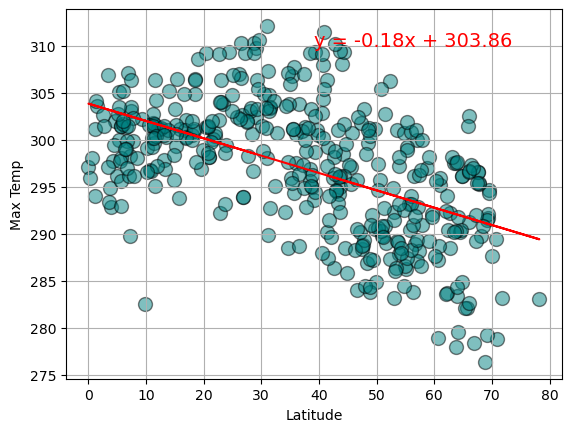

In [15]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp')

The r-value is: 0.7873673854077712


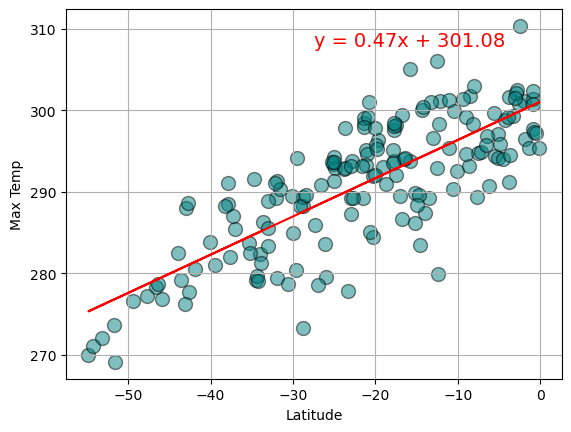

In [16]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** This data is somewhat linearly related which makes sense. As you get closer to the equator the max temperature increases. What is notable is that it is more linear for the southern hemisphere based on the r-value. Another thing to note is that the temperature seems to increase from 0 degrees lat to 30 degrees lat before going down, suggesting that distance from the equator is not the only factor. This is likely related to the tilt of the earth and the time of year (Aug 1).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10461864447463964


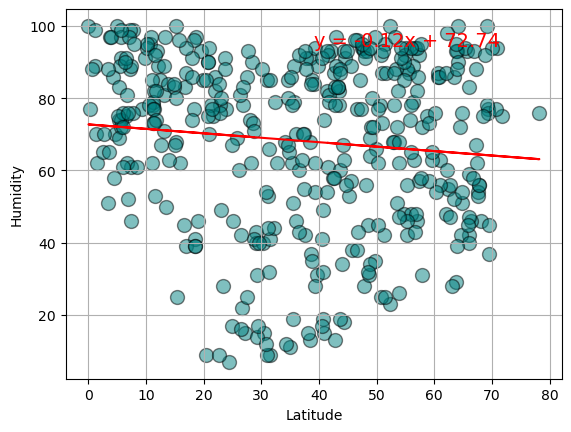

In [17]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity')

The r-value is: 0.031831936768563406


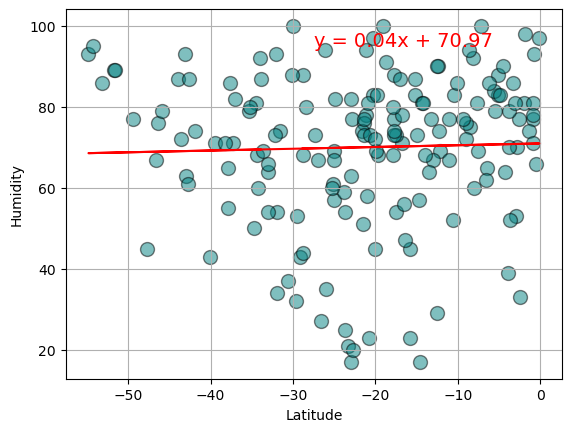

In [18]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity')

**Discussion about the linear relationship:** A linear regression probably isnt the best to analyze this data. From the data it self though we can observe that humidity is very high near the equator, drops off to a minimum around 20 to 30 degrees away from the equator for both the northern and southern hemispheres, and then rises again as you get further from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.19856862018521917


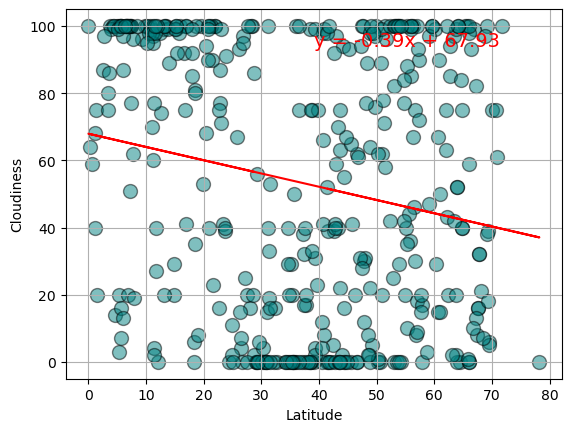

In [19]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness')

The r-value is: 0.0026268459386368814


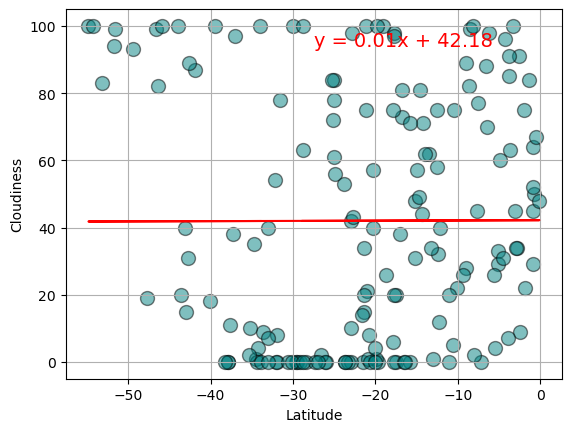

In [20]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The linear regression suggests that the further from the equator you get the more cloudy it will be. However the correlation coefficient for this regression is VERY low. This indicates though the latitude might be a factor in determining the cloudiness, there are also other factors that are likely more important. Still it is interesting to note the trend.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11924475050068432


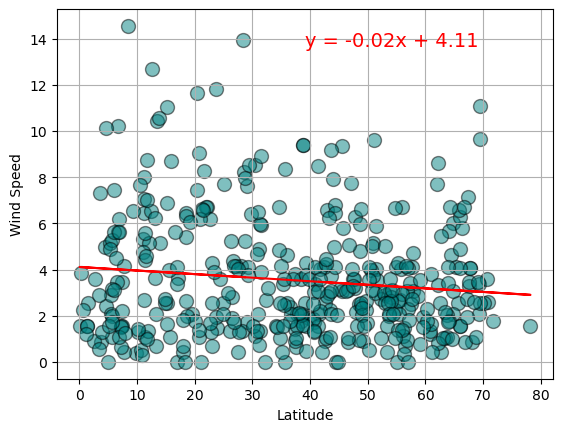

In [21]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed')

The r-value is: -0.3075770697034841


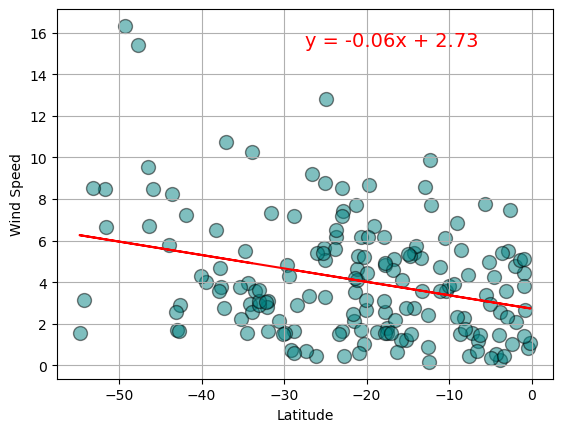

In [22]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Similar to the cloudiness analysis, the regession indicates that the wind speed increases the further you are from the equator, at least at the time the data was collected (Aug 1, 2023). The r-value is again low but not as low as in the cloudiness example. This indicates that there are other factors that determine the wind speed at a given city, but latitude more relevant in determining wind speed than it is in determining cloudiness. 